# LAB 1
## Load Data and visualize
In this Lab you will load measurements from a text file<br>
We could do it by hands but we will use the library pandas. It is a powerful tool for timeseries processing but it is however not efficient for real-time application. <br>
First let's import required libraries.

In [1]:
import os, sys
import pandas
import numpy as np
from datetime import datetime, timedelta
import pytz
import matplotlib.pyplot as plt

## Read a measurement csv file

### old school way
open file <br>
parse file

### pandas
A csv file can be read directly using pandas. Dates can be parsed directly when the format is standard. In our case, hour is given as decimal which is not a supported standard. It required then to do it in two commands.

In [2]:
Data=pandas.read_csv('DATA/BSRN_PAY_1MIN_2005.csv',delimiter=';',comment='#',header=None,names=['Year','Month','Day','UT','GHI','DHI','BNI','T2','RH'])

Visualise the first rows of the results

In [3]:
Data[0:10]

,Year,Month,Day,UT,GHI,DHI,BNI,T2,RH
0,2005,1,1,0.016667,-1.0,0.0,-999.0,0.0,100.0
1,2005,1,1,0.033333,-1.0,0.0,-999.0,0.0,100.0
2,2005,1,1,0.050000,-1.0,0.0,-999.0,0.0,100.0
3,2005,1,1,0.066667,-1.0,-1.0,-999.0,0.0,100.0
4,2005,1,1,0.083333,-1.0,-1.0,-999.0,0.0,100.0
5,2005,1,1,0.100000,-1.0,-1.0,-999.0,0.0,100.0
6,2005,1,1,0.116667,-1.0,-1.0,-999.0,0.0,100.0
7,2005,1,1,0.133333,-1.0,-1.0,-999.0,0.0,100.0
8,2005,1,1,0.150000,-1.0,-1.0,-999.0,0.0,100.0
9,2005,1,1,0.166667,-1.0,-1.0,-999.0,0.0,100.0


As said previously the time is not in a standard format the following lines convert UT time to Hour Minute

In [4]:
#Data['Hour']=Data['UT'].astype(int)
Data.insert(3,'Hour',Data['UT'].astype(int))
Data.insert(4,'Minutes',np.round((Data['UT']*60) % 60).astype(int))
Data.drop(columns='UT',inplace=True)

In [5]:
Data.head()

,Year,Month,Day,Hour,Minutes,GHI,DHI,BNI,T2,RH
0,2005,1,1,0,1,-1.0,0.0,-999.0,0.0,100.0
1,2005,1,1,0,2,-1.0,0.0,-999.0,0.0,100.0
2,2005,1,1,0,3,-1.0,0.0,-999.0,0.0,100.0
3,2005,1,1,0,4,-1.0,-1.0,-999.0,0.0,100.0
4,2005,1,1,0,5,-1.0,-1.0,-999.0,0.0,100.0


Now that it is standard, it can be converted to datetime format.

In [6]:
Data['Datetime']=pandas.to_datetime(Data[['Year','Month','Day','Hour','Minutes']],utc=True)

Check the regularity of the time stamps <br>
Should be 1 min

In [7]:
np.mean(Data['Datetime'].diff())

Timedelta('0 days 00:01:00')

In [8]:
np.std(Data['Datetime'].diff())

Timedelta('0 days 00:00:00')

Set datetime as index

In [9]:
Data.set_index('Datetime',drop=True,inplace=True)

Create a 1-min date vector starting at 20050101T00:01:00Z and ending at 20051231T24:00

In [10]:
tzinfo=pytz.timezone('utc')
date_begin=datetime(2005,1,1,0,tzinfo=tzinfo)
date_end=datetime(2005,12,31,0,0,tzinfo=tzinfo)
complete_index=pandas.date_range(date_begin+timedelta(minutes=1),date_end+timedelta(days=1),freq='min',tz='utc')

In [11]:
Data.reindex(complete_index)

,Year,Month,Day,Hour,Minutes,GHI,DHI,BNI,T2,RH
2005-01-01 00:01:00+00:00,2005,1,1,0,1,-1.0,0.0,-999.0,0.0,100.0
2005-01-01 00:02:00+00:00,2005,1,1,0,2,-1.0,0.0,-999.0,0.0,100.0
2005-01-01 00:03:00+00:00,2005,1,1,0,3,-1.0,0.0,-999.0,0.0,100.0
2005-01-01 00:04:00+00:00,2005,1,1,0,4,-1.0,-1.0,-999.0,0.0,100.0
2005-01-01 00:05:00+00:00,2005,1,1,0,5,-1.0,-1.0,-999.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...
2005-12-31 23:56:00+00:00,2005,12,31,23,56,-3.0,-3.0,-999.0,4.9,87.8
2005-12-31 23:57:00+00:00,2005,12,31,23,57,-3.0,-3.0,-999.0,4.8,88.1
2005-12-31 23:58:00+00:00,2005,12,31,23,58,-3.0,-3.0,-999.0,4.8,88.6
2005-12-31 23:59:00+00:00,2005,12,31,23,59,-3.0,-3.0,-999.0,4.8,88.8


In [12]:
Data=Data.replace(-999,np.nan)

Acces date where data is missing

In [13]:
Data.index[Data.isnull().any(axis=1)]

DatetimeIndex(['2005-01-01 00:01:00+00:00', '2005-01-01 00:02:00+00:00',
               '2005-01-01 00:03:00+00:00', '2005-01-01 00:04:00+00:00',
               '2005-01-01 00:05:00+00:00', '2005-01-01 00:06:00+00:00',
               '2005-01-01 00:07:00+00:00', '2005-01-01 00:08:00+00:00',
               '2005-01-01 00:09:00+00:00', '2005-01-01 00:10:00+00:00',
               ...
               '2005-12-31 23:51:00+00:00', '2005-12-31 23:52:00+00:00',
               '2005-12-31 23:53:00+00:00', '2005-12-31 23:54:00+00:00',
               '2005-12-31 23:55:00+00:00', '2005-12-31 23:56:00+00:00',
               '2005-12-31 23:57:00+00:00', '2005-12-31 23:58:00+00:00',
               '2005-12-31 23:59:00+00:00', '2006-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Datetime', length=279863, freq=None)

Plot values. First import matplotlib. In Jupyter there is a shortcut for importing all you need: %pylab inline <br>
Be careful it replaces all the import you made before see under

C:\Users\aboilley\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0.5, 0, 'Date')

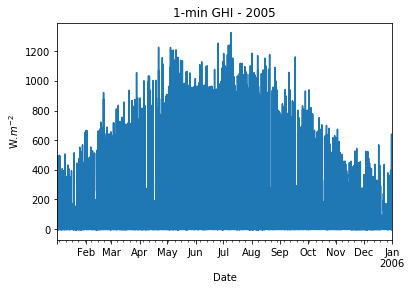

In [14]:
Data['GHI'].plot(title='1-min GHI - 2005')
plt.ylabel(r'W.$m^{-2}$')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

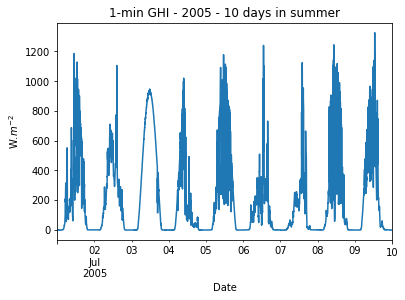

In [15]:
Data['GHI'].loc[(Data.index >datetime(2005,7,1,tzinfo=tzinfo)) & (Data.index <= datetime(2005,7,10,tzinfo=tzinfo))].plot(title='1-min GHI - 2005 - 10 days in summer')
plt.ylabel(r'W.$m^{-2}$')
plt.xlabel('Date')

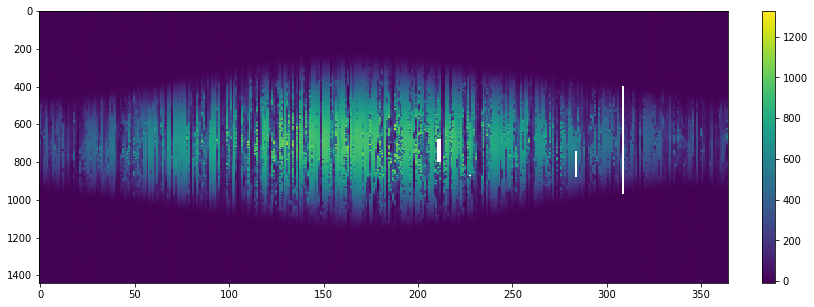

In [16]:
days=pandas.date_range(date_begin,date_end,freq='D')
nb_days=len(days)
nb_min=1440
GHI=np.reshape(Data.GHI.values,(nb_days,nb_min))
plt.figure(figsize=(15,5))
plt.imshow(np.transpose(GHI),aspect=.1)
plt.colorbar(fraction=0.046, pad=0.04)

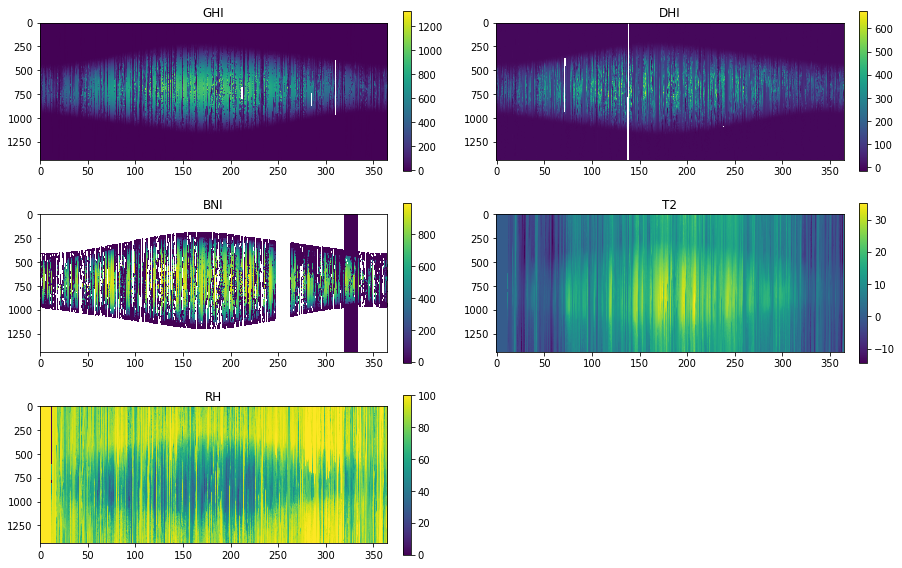

In [17]:
plt.figure(figsize=(15,10))
for i,k in enumerate(['GHI', 'DHI', 'BNI', 'T2', 'RH']):
    plt.subplot(3,2,i+1)
    dat=np.reshape(Data[k].values,(nb_days,nb_min))
    plt.imshow(np.transpose(dat),aspect=.1)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title(k)

# LAB 2
## Call web services 
In this Lab you will call web services to obtain solar position or top of atmosphere irradiance for example<br>
For readability purposes the functions has been coded outside this notebook. It can be found in python_functions directory. By default this directory is not known by jupyter. We need to add it to path.

In [18]:
module_path = os.path.abspath(os.path.join('python_functions'))
if module_path not in sys.path:
    sys.path.append(module_path)

Import the wps module which contains all the call functions

In [19]:
import wps

Call the SG2 functions to obtain solar position

In [20]:
location=[46.815000, 6.944000, 491]
try:
    SG2=pandas.read_pickle('SG2.zip')
except:
    SG2=wps.wps_SG2(location,date_begin+timedelta(seconds=30),date_end+timedelta(days=1)-timedelta(seconds=30),1/60.)
    SG2.to_pickle('SG2.zip')

Set index to the SG2 dataframe (you should not do it this way normally) and merge it to the Data Dataframe

In [21]:
SG2=SG2.set_index(complete_index).drop(['JDUT','YYYY','MM','DD','H','DOY'],axis=1)
Data=Data.merge(SG2, left_index=True, right_index=True)
Data.head()

,Year,Month,Day,Hour,Minutes,GHI,DHI,BNI,T2,RH,DELTA,OMEGA,GAMMA_S0,ALPHA_S,R
Datetime,,,,,,,,,,,,,,,
2005-01-01 00:01:00+00:00,2005,1,1,0,1,-1.0,0.0,NaN,0.0,100.0,-0.401657,57538.377855,-1.146309,0.244209,0.983449
2005-01-01 00:02:00+00:00,2005,1,1,0,2,-1.0,0.0,NaN,0.0,100.0,-0.401656,57538.382216,-1.145572,0.253783,0.983449
2005-01-01 00:03:00+00:00,2005,1,1,0,3,-1.0,0.0,NaN,0.0,100.0,-0.401655,57538.386578,-1.144808,0.263329,0.983449
2005-01-01 00:04:00+00:00,2005,1,1,0,4,-1.0,-1.0,NaN,0.0,100.0,-0.401654,57538.390940,-1.144017,0.272845,0.983449
2005-01-01 00:05:00+00:00,2005,1,1,0,5,-1.0,-1.0,NaN,0.0,100.0,-0.401653,57538.395302,-1.143198,0.282331,0.983449


In [22]:
#to free memory
del(SG2)

In [23]:
SG2_GAMMAS = np.reshape(Data.GAMMA_S0.values,(nb_days,nb_min))# solar elevation in radian
Data['THETAS']= np.pi/2 - Data.GAMMA_S0# solar zenithal angle in radian
SG2_ALPHAS = np.reshape(Data.ALPHA_S.values,(nb_days,nb_min))# solar azimuth angle
SG2_DAY = (SG2_GAMMAS > 0);

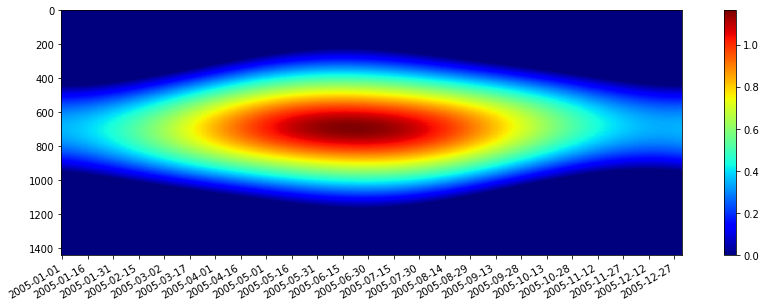

In [24]:
fig=plt.figure(figsize=(15,5))
jet = plt.cm.jet
plt.imshow(np.transpose(SG2_GAMMAS*SG2_DAY),aspect=.1,cmap=jet)
plt.xticks(range(0,365,15),days[::15].strftime('%Y-%m-%d'))
fig.autofmt_xdate()

plt.colorbar()

In [25]:
try:
    CAMS=pandas.read_pickle('CAMS.zip')
except:
    CAMS=wps.wps_CAMS_RAD(location,date_begin,date_end,1./60,'alexandre.boilley@transvalor.com')
    CAMS.to_pickle('CAMS.zip')

In [26]:
CAMS=CAMS.set_index(complete_index)
Data=Data.merge(CAMS, left_index=True, right_index=True,suffixes=('','_CAMS'))

In [27]:
Data.head()

,Year,Month,Day,Hour,Minutes,GHI,DHI,BNI,T2,RH,...,TOA,CLEAR_SKY_GHI,CLEAR_SKY_BHI,CLEAR_SKY_DHI,CLEAR_SKY_BNI,GHI_CAMS,BHI,DHI_CAMS,BNI_CAMS,Reliability
Datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-01 00:01:00+00:00,2005,1,1,0,1,-1.0,0.0,NaN,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2005-01-01 00:02:00+00:00,2005,1,1,0,2,-1.0,0.0,NaN,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2005-01-01 00:03:00+00:00,2005,1,1,0,3,-1.0,0.0,NaN,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2005-01-01 00:04:00+00:00,2005,1,1,0,4,-1.0,-1.0,NaN,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2005-01-01 00:05:00+00:00,2005,1,1,0,5,-1.0,-1.0,NaN,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# LAB 3
## Apply different Quality check

QC Extremely Rare Limit (ERL) for GHI

In [28]:
Data['TOANI']=np.nan
Data.loc[Data.GAMMA_S0>0,'TOANI']=1440*Data.TOA/np.cos(Data.THETAS)

In [29]:
QC_GHI_ERL = (Data.GHI <= (0.03*Data.TOA)) | (Data.GHI > 1.2*Data.TOANI*np.sin(Data.GAMMA_S0)**1.2 + 50)
QC_GHI_ERL[Data.GAMMA_S0<0] = False

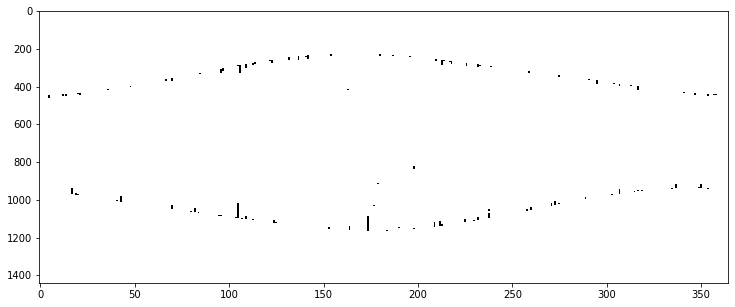

In [30]:
plt.figure(figsize=(15,5))
cmap=plt.cm.Greys
plt.imshow(np.transpose(np.reshape(QC_GHI_ERL.values,(nb_days,nb_min))),aspect=.1,cmap=cmap)

In [31]:
QC_DHI_ERL = (Data.DHI <= (0.03*Data.TOA)) | (Data.DHI > 0.75*Data.TOANI*np.cos(Data.THETAS)**1.2 + 30)
QC_DHI_ERL[Data.GAMMA_S0<0] = False

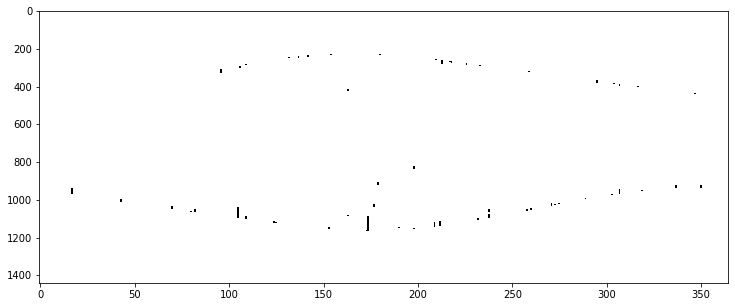

In [32]:
plt.figure(figsize=(15,5))
cmap=plt.cm.Greys
plt.imshow(np.transpose(np.reshape(QC_DHI_ERL.values,(nb_days,nb_min))),aspect=.1,cmap=cmap)

In [33]:
QC_BNI_ERL = (Data.BNI > 0.95*Data.TOA*np.cos(Data.THETAS)**0.2 + 10)
QC_BNI_ERL[Data.THETAS>=np.pi/2] = False

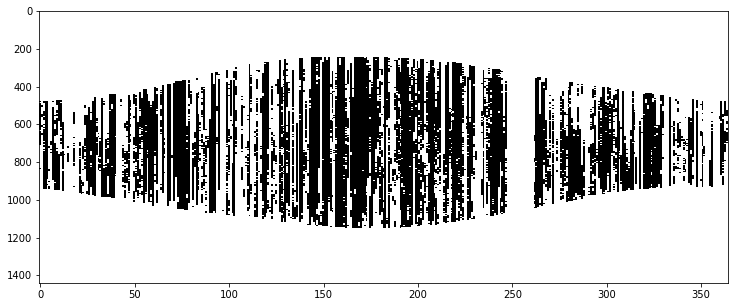

In [34]:
plt.figure(figsize=(15,5))
cmap=plt.cm.Greys
plt.imshow(np.transpose(np.reshape(QC_BNI_ERL.values,(nb_days,nb_min))),aspect=.1,cmap=cmap)

<b>Decision to set to NaN all the QC flagged data

In [35]:
Data.loc[QC_GHI_ERL.values,'GHI'] = np.nan
Data.loc[QC_DHI_ERL.values,'DHI'] = np.nan
Data.loc[QC_BNI_ERL.values,'BNI'] = np.nan

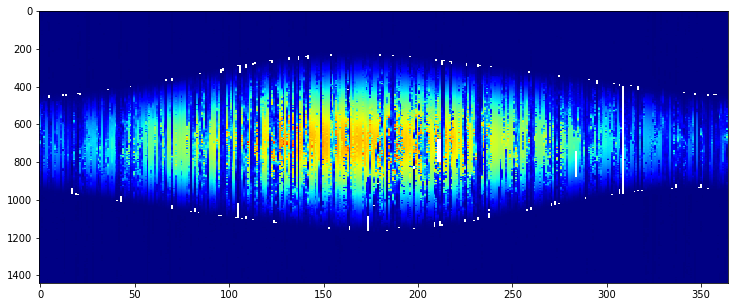

In [36]:
plt.figure(figsize=(15,5))
plt.imshow(np.transpose(np.reshape(Data.GHI.values,(nb_days,nb_min))),aspect=.1,cmap=jet)

<b>2-component test on GHI, DHI

In [40]:
R_T2C = np.zeros(len(Data.GHI))*np.nan
C = Data.GHI>50
R_T2C[C] = Data.DHI[C]/Data.GHI[C];

max_T2C = 1.1*np.ones(len(Data.GHI))
max_T2C[Data.THETAS<75*np.pi/180] = 1.05;

QC_T2C = R_T2C > max_T2C

C:\Users\aboilley\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


<b>(KT, KD) diagram

In [41]:
mask=(Data.GAMMA_S0>0.1) & (~np.isnan(Data.GHI)) & (Data.GHI > 20) & (~np.isnan(Data.TOA)) & (Data.TOA>(20/60.))
KT = Data.GHI[mask].values/(60*CAMS.TOA[mask].values)

In [42]:
KD = Data.DHI[mask]/(Data.GHI[mask])

In [43]:
H,xedges,yedges=np.histogram2d(KD,KT,range=[(0,1),(0,1)],bins=200)

C:\Users\aboilley\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


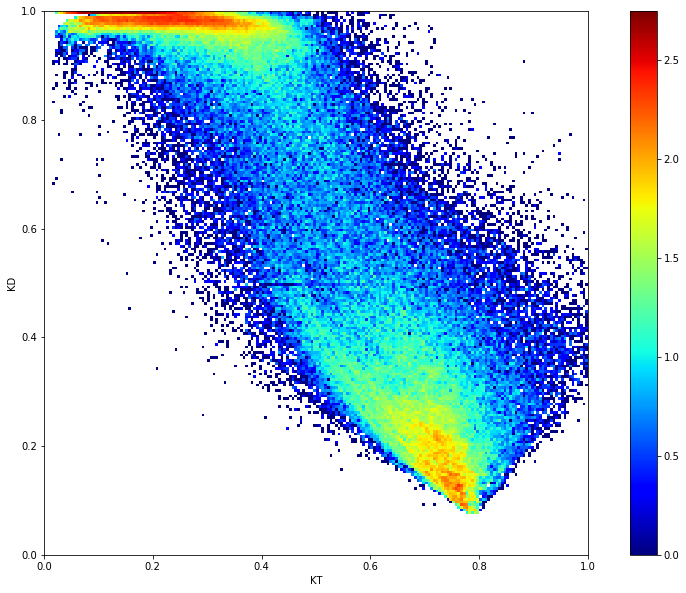

In [44]:
fig=plt.figure(figsize=(15,10))
#H[H==0]=np.nan
plt.imshow(np.log10((H)),extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],origin='low',cmap=jet)
plt.xlabel('KT')
plt.ylabel('KD')
plt.colorbar()

<b>3 component test GHI, DHI, BNI

In [45]:
R_T3C = np.zeros(len(Data.GHI))*np.nan
GHIc=Data.DHI+Data.BNI*np.cos(Data.THETAS)
C = GHIc > 50
R_T3C[C] = Data.GHI[C]/GHIc[C];

max_T3C = 1.15*np.ones(len(Data.GHI))
max_T3C[Data.THETAS<75*np.pi/180] = 1.08;

QC_T3C = np.abs(1-R_T3C) > max_T3C

C:\Users\aboilley\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [46]:
QC_T3C.sum()

6

<b>Use a WPS for local horizon computation

In [47]:
try:
    HZ=pandas.read_pickle('HZ_SRTM.zip')
except:
    HZ = wps.wps_Horizon_SRTM(location)
    HZ.to_pickle('HZ_SRTM.zip')


In [48]:
HZ.columns

Index(['AZIMUT', 'ELEVATION'], dtype='object')

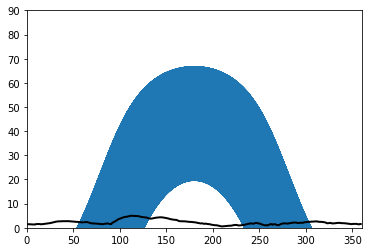

In [49]:
plt.plot(Data.ALPHA_S*180./np.pi,Data.GAMMA_S0*180/np.pi)
plt.xlim((0,360))
plt.ylim((0,90))
plt.plot(HZ.AZIMUT,HZ.ELEVATION,'k',linewidth=2)

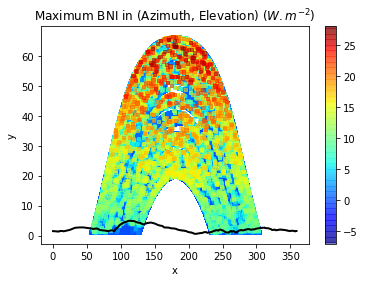

In [68]:
vSEA = Data.loc[Data.GAMMA_S0>1/50,'GAMMA_S0']
vSAA = Data.loc[Data.GAMMA_S0>1/50,'ALPHA_S']
vBNI = Data.loc[Data.GAMMA_S0>1/50,'BNI']

idx_sort = np.argsort(vBNI.values)


plt.scatter(vSAA[idx_sort]*180/np.pi, vSEA[idx_sort]*180/np.pi, s=10, c=vBNI[idx_sort], cmap=jet,marker='s',alpha=.5)
plt.title(r'Maximum BNI in (Azimuth, Elevation) $(W.m^{-2})$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.plot(HZ.AZIMUT,HZ.ELEVATION,'k',linewidth=2)

### Compute common statistics
- reference mean
- rmse
- relative mean
- relative rmse
- correlation coefficient

In [91]:
rmean=60*Data.GHI_CAMS.mean()
rmse=np.sqrt((Data.GHI-Data.GHI_CAMS*60)**2).mean()
rmse_r=rmse/rmean
bias=(Data.GHI-Data.GHI_CAMS*60).mean()
bias_r=bias/rmean
mask=(~np.isnan(Data.GHI)) & (~np.isnan(Data.GHI_CAMS))
cc=np.corrcoef(Data.GHI[mask],Data.GHI_CAMS[mask]*60)

In [93]:
print(cc[0][1])

0.952067532127998
